In [1]:
# Feature extraction example
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [2]:
# Load the example clip
y, sr = librosa.load("/Users/spacecoffin/Dropbox/School/IS/12_13/aif_files/1aa932121587c599c9b45b143995bdbc.aiff")

In [3]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# And the first-order & second-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

/Users/spacecoffin/Development/sprbrg/lib/python3.5/site-packages/numpy/core/numeric.py:482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return array(a, dtype, copy=False, order=order)


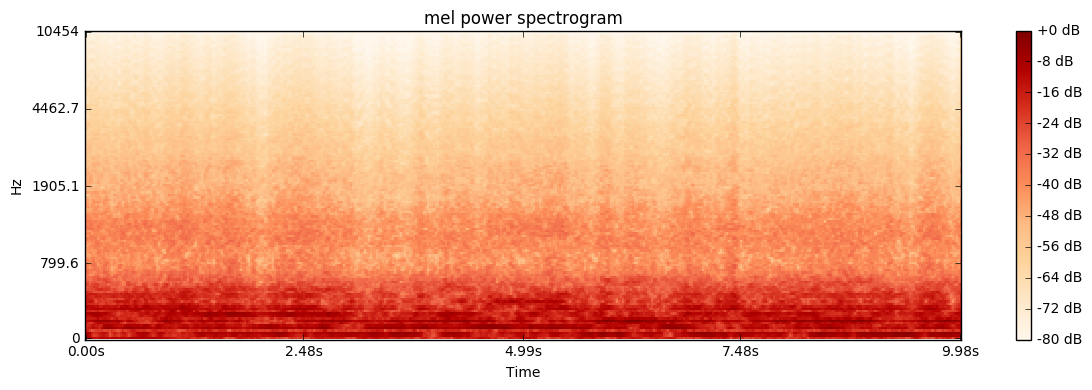

In [4]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

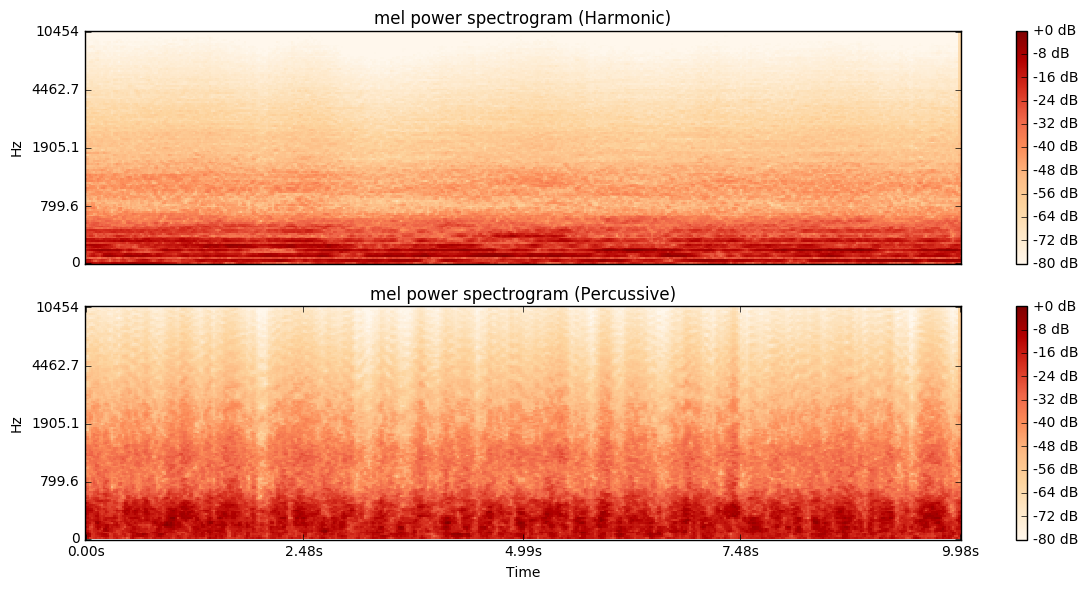

In [5]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

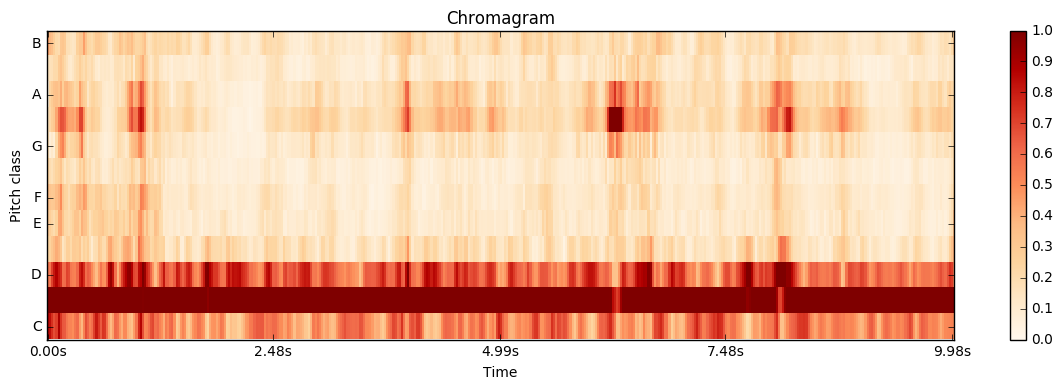

In [6]:
# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

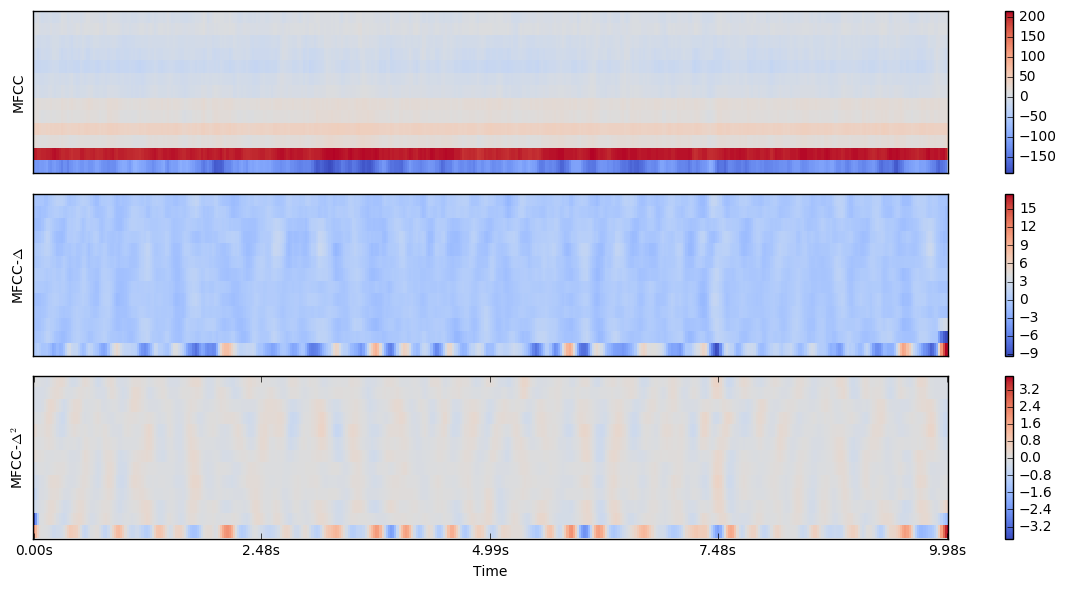

In [7]:
# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(mfcc_delta)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(mfcc_delta2, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, mfcc_delta, mfcc_delta2])

In [8]:
M.shape

(39, 431)

In [9]:
mfcc.shape

(13, 431)

In [10]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

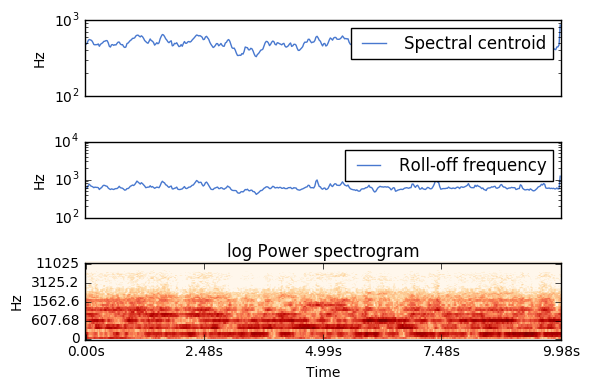

In [11]:
plt.figure(figsize=(10, 20))

f, (ax1, ax2, ax3) = plt.subplots(3)

# Plot spectral centroid
#plt.subplot(2, 1, 1)
ax1.semilogy(cent.T, label='Spectral centroid')
ax1.set_ylabel('Hz')
ax1.set_xticks([])
ax1.set_xlim([0, cent.shape[-1]])
ax1.legend()

# Plot roll-off frequency
#plt.subplot(2, 1, 2)
ax2.semilogy(rolloff.T, label='Roll-off frequency')
ax2.set_ylabel('Hz')
ax2.set_xticks([])
ax2.set_xlim([0, rolloff.shape[-1]])
ax2.legend()

#plt.subplot(2, 1, 3)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max),
                         y_axis='log', x_axis='time')
ax3.set_title('log Power spectrogram')
plt.tight_layout()

In [12]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

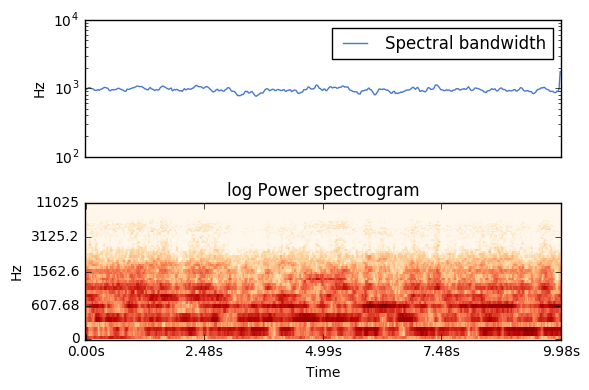

In [13]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(spec_bw.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bw.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

In [14]:
librosa.autocorrelate(y)

array([  4.76939453e+04,   4.75937344e+04,   4.73005742e+04, ...,
         4.75405650e-05,   4.98966947e-05,   4.90572675e-05], dtype=float32)

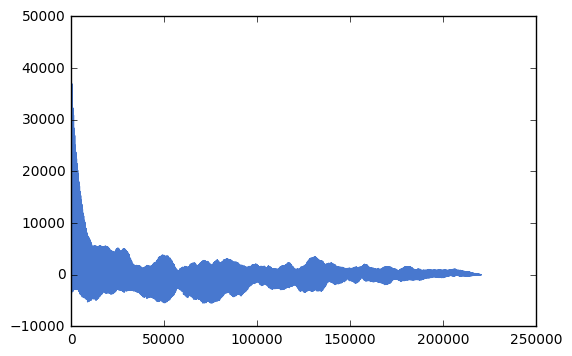

In [17]:
plt.plot(librosa.autocorrelate(y))

(array([  9.04890000e+04,   1.27051000e+05,   1.87600000e+03,
          4.96000000e+02,   2.84000000e+02,   1.60000000e+02,
          9.10000000e+01,   5.30000000e+01,   4.00000000e+00,
          8.00000000e+00]),
 array([ -5478.32470703,   -161.09770508,   5156.12929688,  10473.35629883,
         15790.58330078,  21107.81030273,  26425.03730469,  31742.26430664,
         37059.49130859,  42376.71831055,  47693.9453125 ]),
 <a list of 10 Patch objects>)

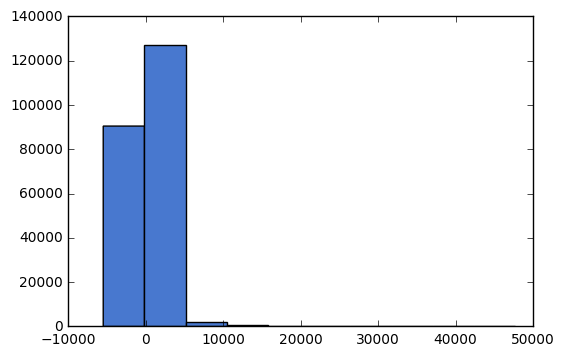

In [16]:
plt.hist(librosa.autocorrelate(y))

In [18]:
type(y)

numpy.ndarray

In [19]:
from scipy import stats

In [26]:
stats.describe(mfcc).minmax

AttributeError: 'tuple' object has no attribute 'size'

In [22]:
mfcc.shape

(13, 431)

In [27]:
y.shape

(220512,)

In [28]:
stats.describe(y)

DescribeResult(nobs=220512, minmax=(-0.99830753, 0.99697661), mean=0.011573005, variance=0.21615432, skewness=-0.023696649819612503, kurtosis=-0.9416924209639435)

In [32]:
stats.describe(mfcc.T)

DescribeResult(nobs=431, minmax=(array([-189.69812175,  153.64315364,    7.57157894,   32.26780297,
          5.66197228,   11.22296826,   -7.23690556,  -11.37845766,
        -24.56970908,  -15.97335806,  -11.75691812,   -2.30555281,
         -6.35202491]), array([ -52.80954218,  214.63539017,   38.74492787,   48.54296783,
         23.83995393,   24.67309767,   12.24286519,    7.21440422,
          2.22552576,    5.13739341,    8.56280645,   15.19650009,
         10.74222902])), mean=array([-128.09850132,  205.52906339,   17.85974561,   40.6243564 ,
         15.95554101,   19.06275112,    1.60481791,   -2.47200733,
        -12.92173906,   -7.16017837,   -3.22608878,    5.07160053,
          1.73633996]), variance=array([ 435.41109175,   21.75884806,   14.99037276,    6.04934515,
          9.84046719,    5.1724221 ,   11.17743334,   10.45395582,
         22.11953134,   16.79251303,   10.51712841,    7.99564701,
         12.36348671]), skewness=array([-0.4404331 , -3.40899019,  0.4811261

In [33]:
mfcc.T

array([[-113.23551728,  205.02851909,   17.67290451, ...,    1.13247563,
           7.20006448,   -1.17196437],
       [-115.25235356,  205.28700306,   17.37658296, ...,   -0.91021091,
           8.89969393,    1.1570998 ],
       [-116.74665045,  200.89690891,   15.57618605, ...,   -7.2470765 ,
           7.09075695,    4.90230775],
       ..., 
       [-145.788135  ,  210.30130799,   21.18053251, ...,    0.91196387,
           8.61871335,    3.58045726],
       [-136.26056638,  204.18484571,   25.28792104, ...,   -1.33209575,
           8.9048425 ,    5.48278525],
       [ -52.80954218,  153.64315364,   38.74492787, ...,   -2.6737761 ,
           0.59895677,   -0.49631524]])